# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

## Load the data

In [2]:
# Load the Titanic dataset
df = pd.read_csv('titanic_data.csv')

## Exploring the data

In [3]:
# Showing head of data (first 5 rows of data)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe().style.background_gradient(cmap='nipy_spectral')

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,713.000000,889.000000,889.000000,889.000000
mean,0.384702,2.307087,29.698696,0.523060,0.382452,32.259059
std,0.486799,0.836367,14.536691,1.103729,0.806761,49.735870
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Inspect the dataset
print("Initial Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB
None

Missing Values:
survived         0
pclass           0
sex              0
age     

## Data Preprocessing


### Handling missing values

In [6]:
# Define columns with missing values
columns_with_missing = ['age', 'embarked','deck','embark_town']

# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Columns with missing values after dropping columns
columns_with_missing = df.columns[df.isnull().any()].tolist()

# Forward fill missing values for remaining columns
df[columns_with_missing] = df[columns_with_missing].fillna(method='ffill')

In [7]:
print("Initial Dataset Info:")
print(df.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.2+ KB
None


### Defining categorical and numerical columns

In [8]:
# Define numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle categorical data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

### Handling Categorical Data

In [9]:
for column in categorical_columns:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes

### Data Visualization

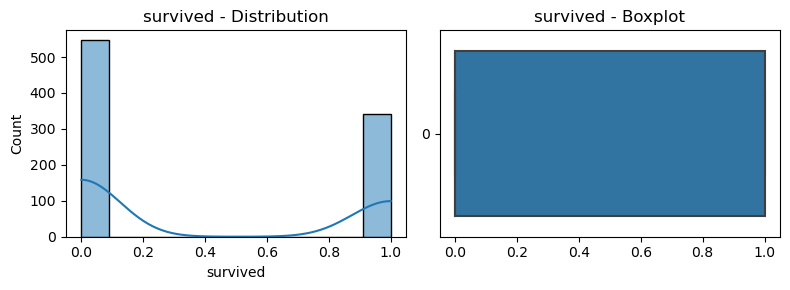

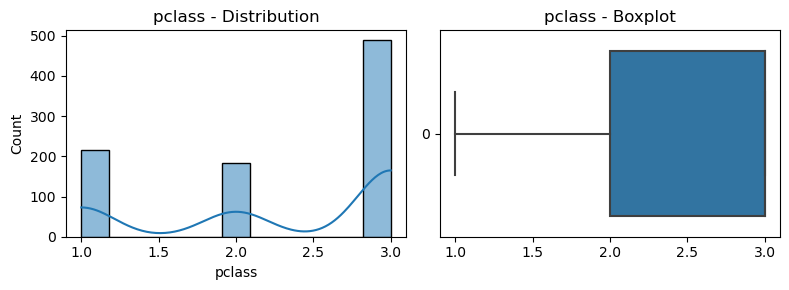

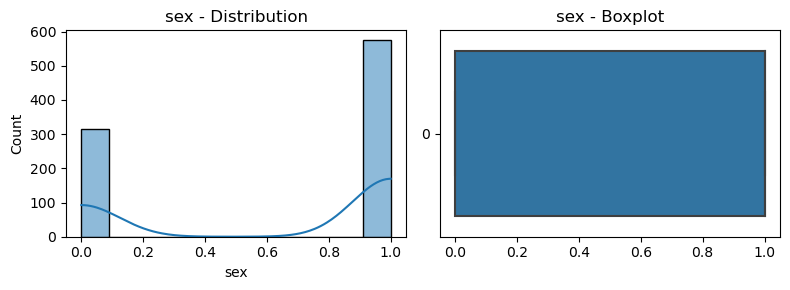

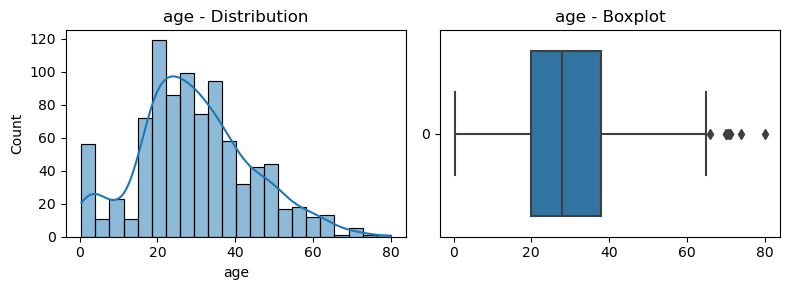

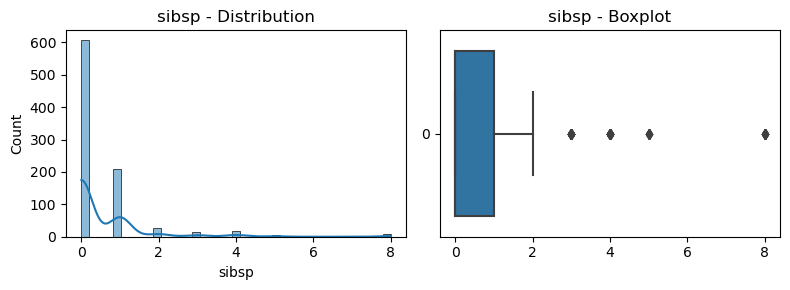

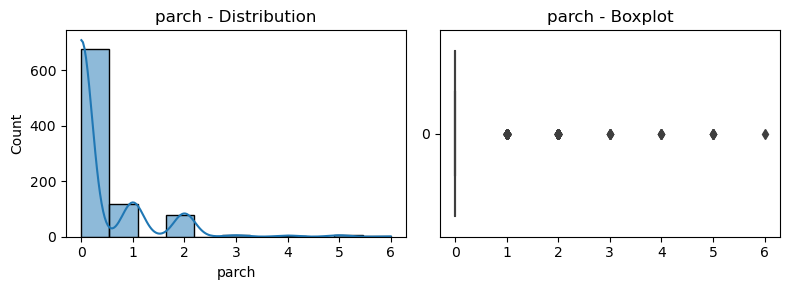

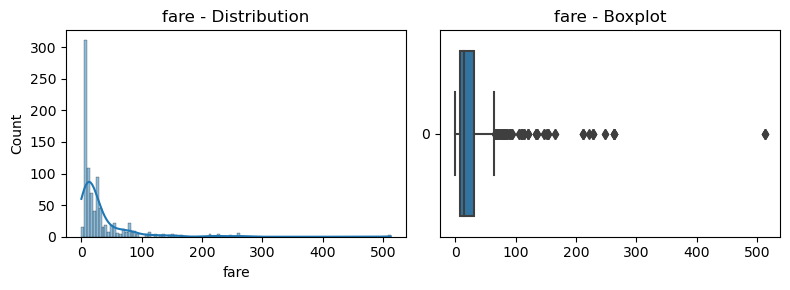

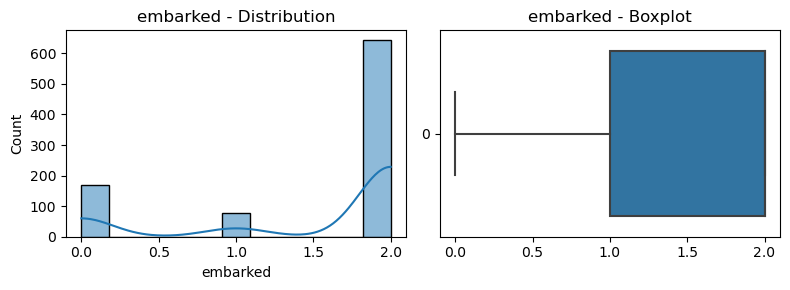

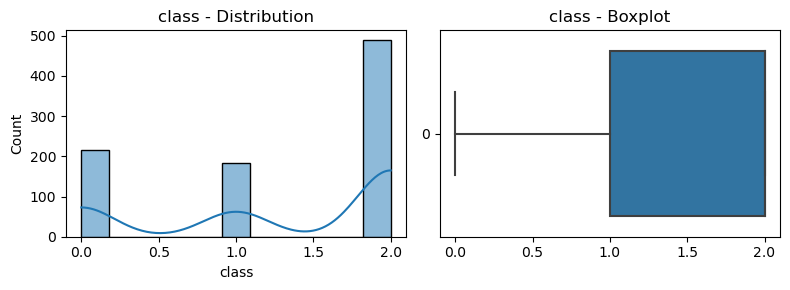

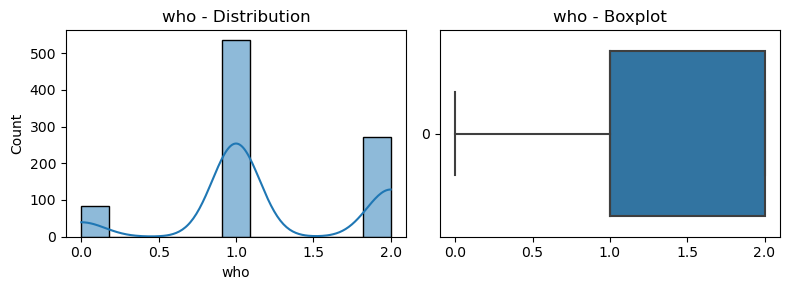

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


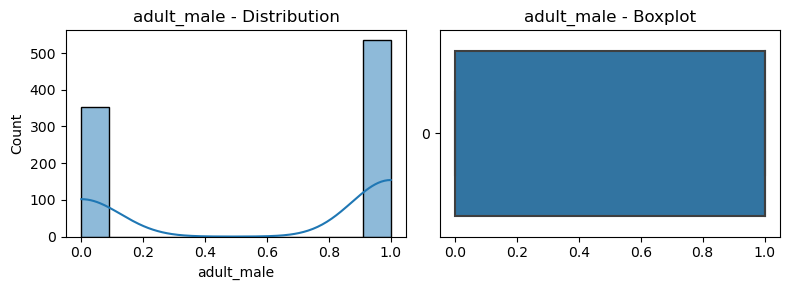

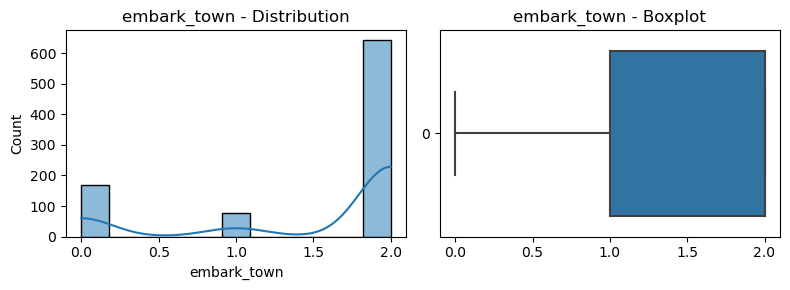

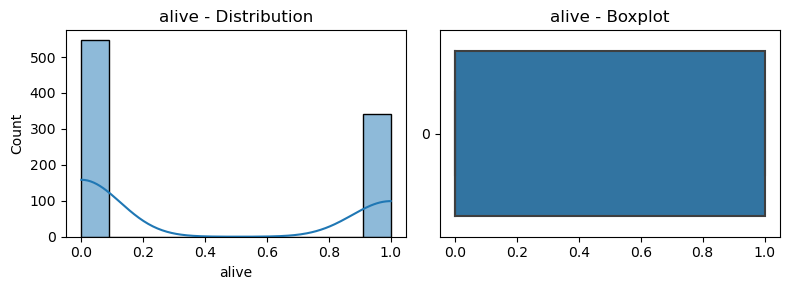

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


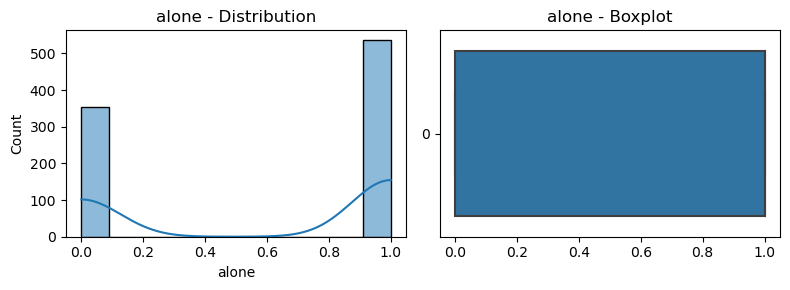

In [10]:
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=df[column], kde=True, ax=axes[0])
    sns.boxplot(data=df[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

### Removing Outliers

From the plotting we can see that there are outliers in our data, So i will use Interquartile range

In [12]:
# Handle outliers using IQR method
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
for feature in numeric_features:
    df[feature] = np.where((df[feature] < lower_bound[feature]) | (df[feature] > upper_bound[feature]), df[feature].median(), df[feature])

# Scale numerical features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


### Visualizing the data after removing outliers

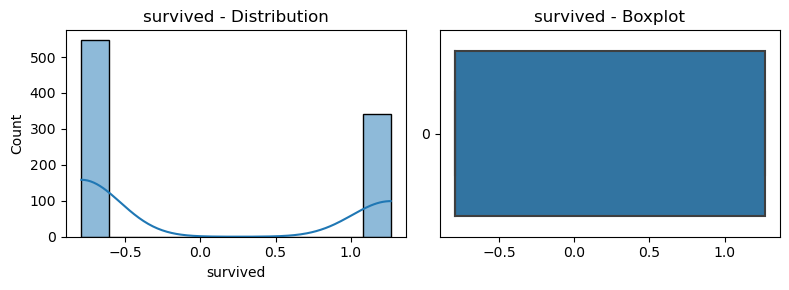

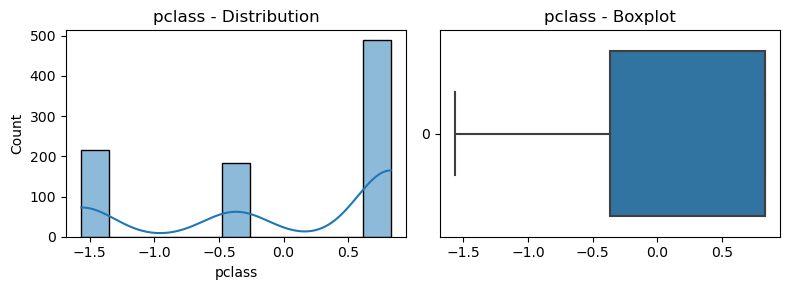

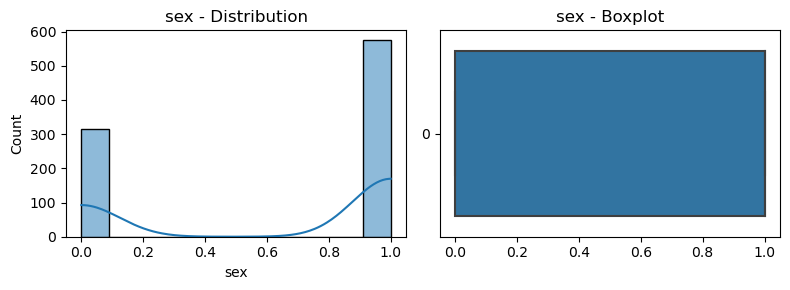

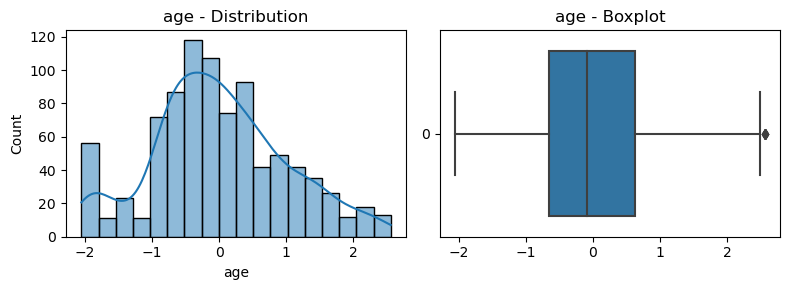

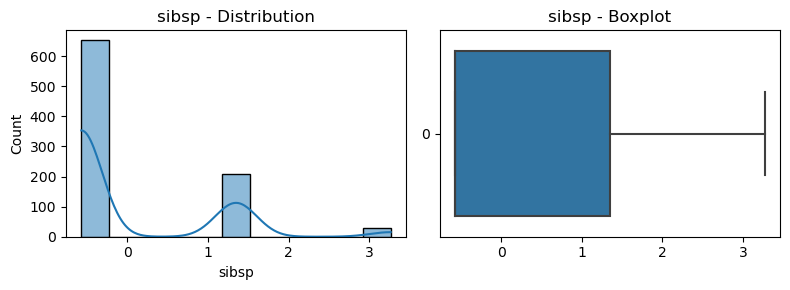

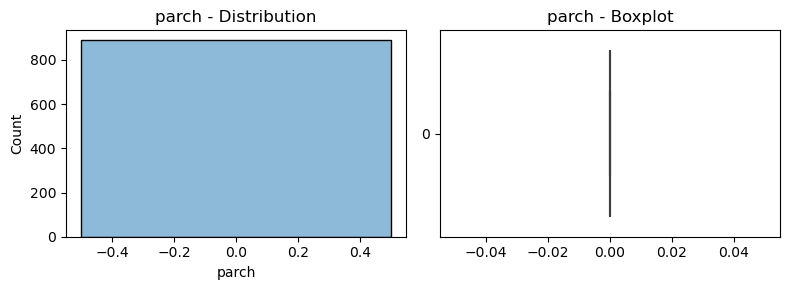

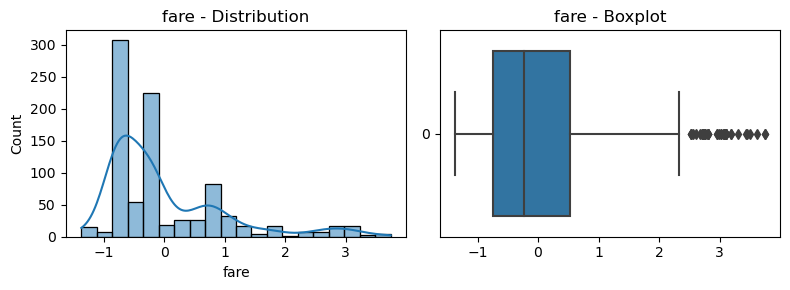

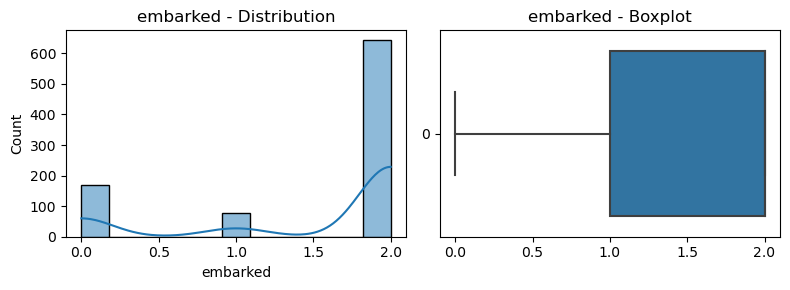

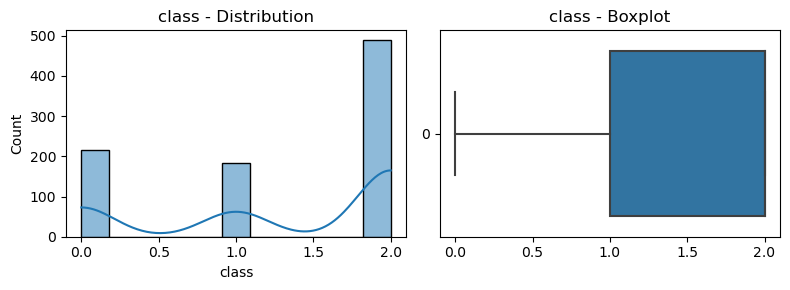

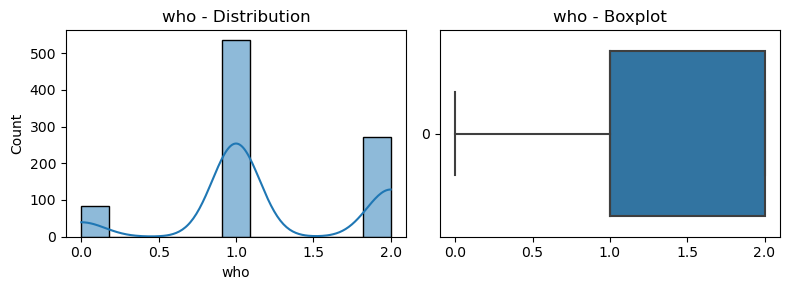

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


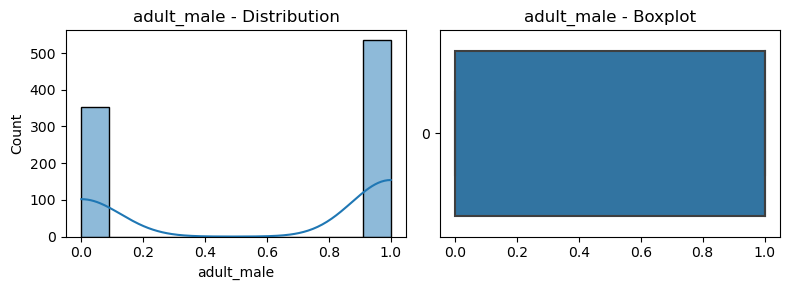

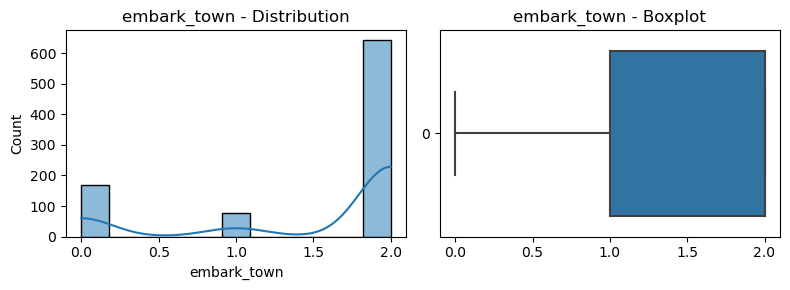

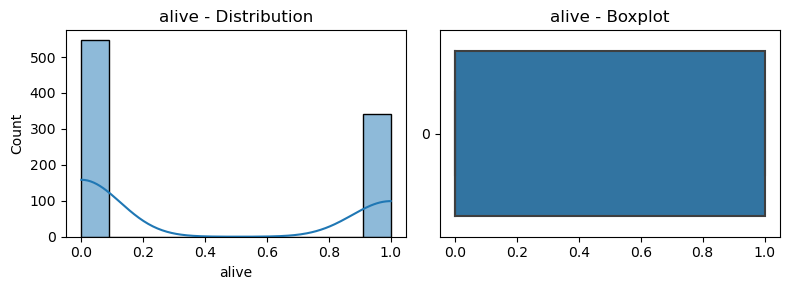

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


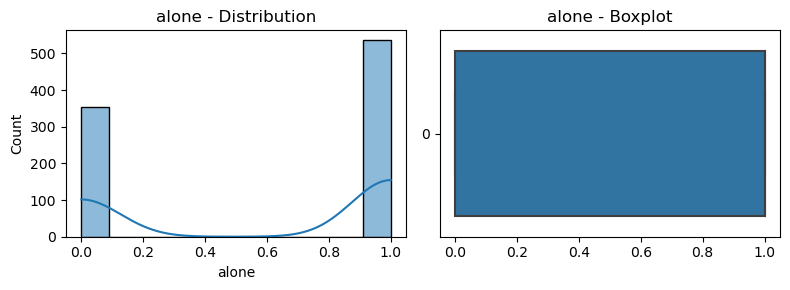

In [13]:
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=df[column], kde=True, ax=axes[0])
    sns.boxplot(data=df[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

## EDA

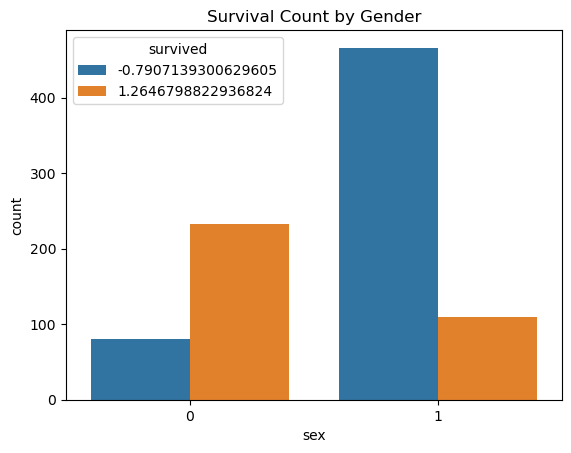

In [16]:
# Visualize Survival Rate by Gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

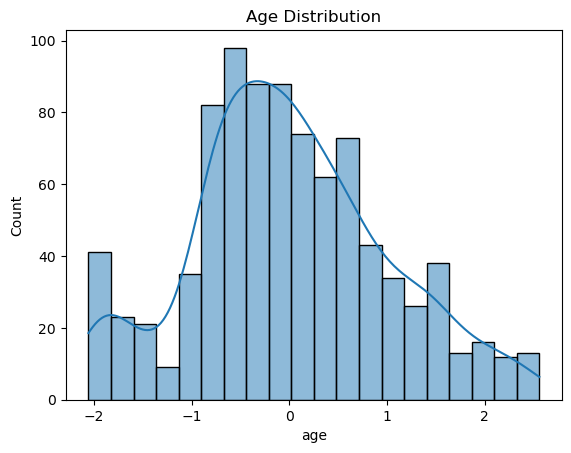

In [17]:
# Visualize Age Distribution
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

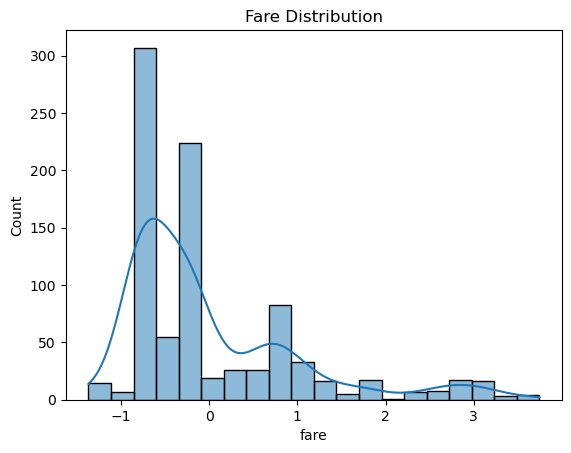

In [18]:
# Visualize Fare Distribution
sns.histplot(data=df, x='fare', bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

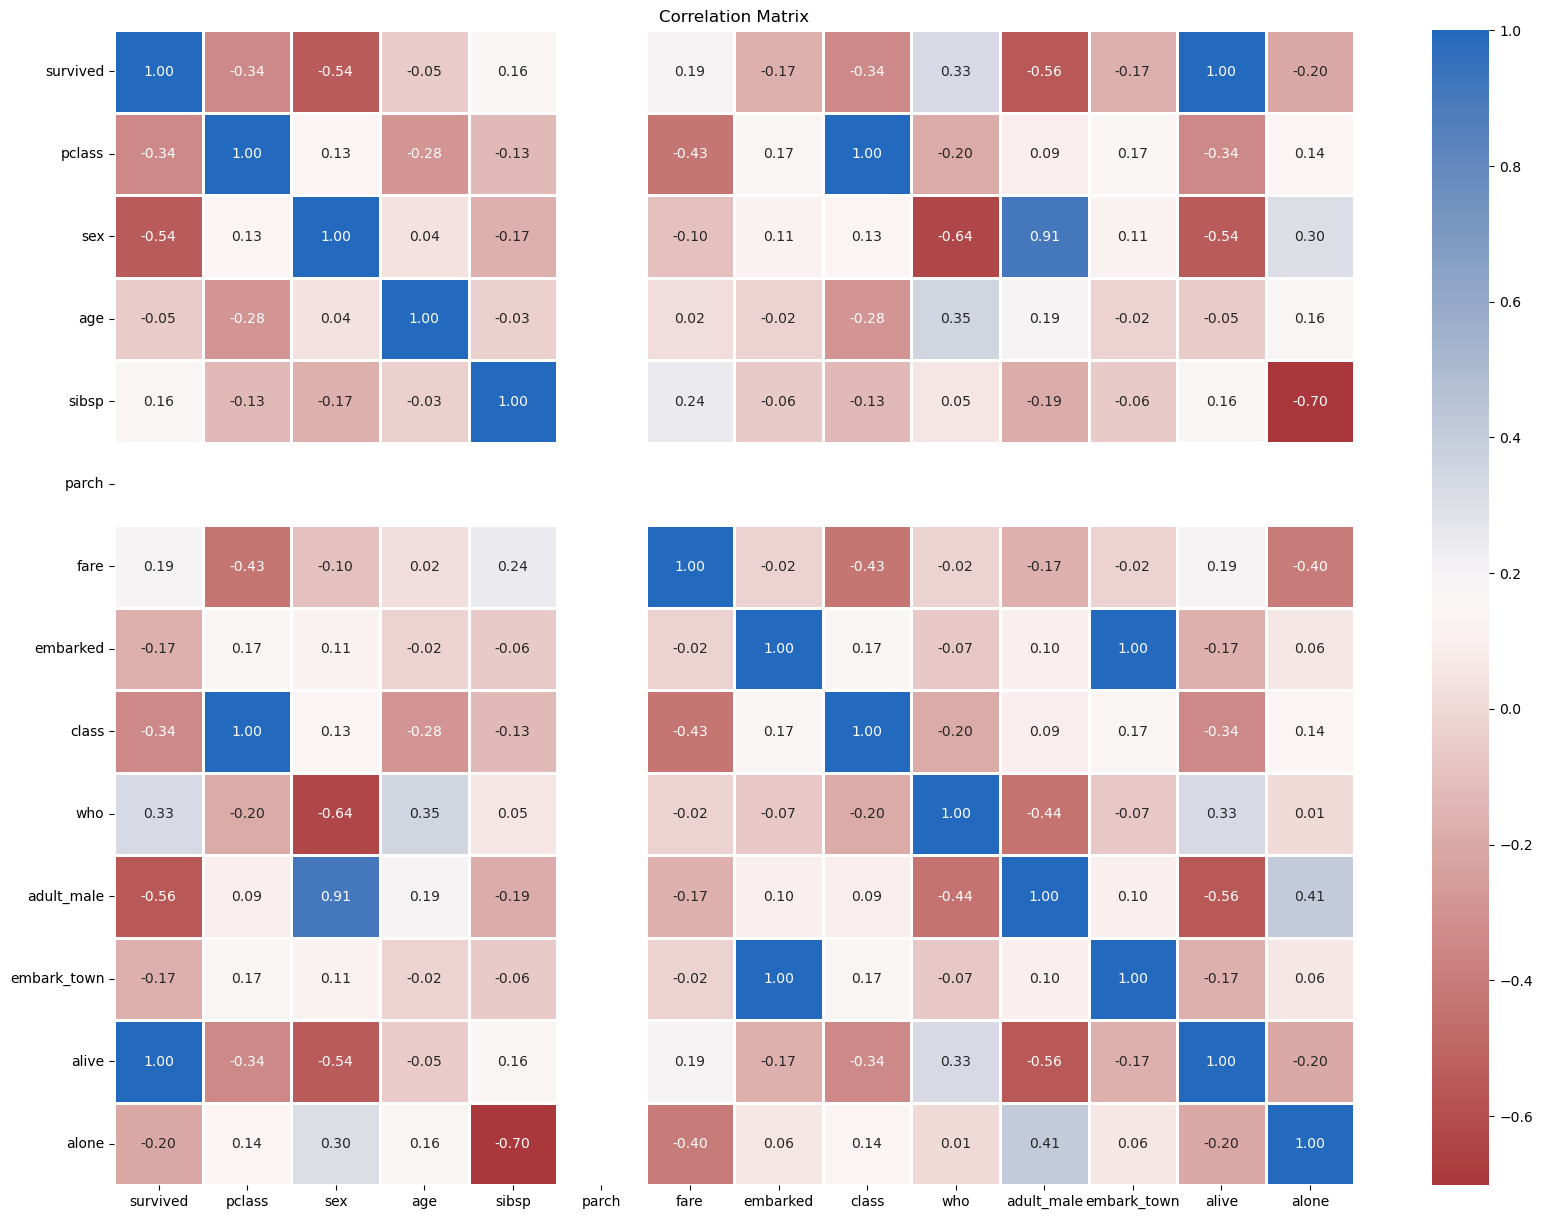

In [22]:
# Correlation Matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True) 
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), cmap='vlag_r', annot=True, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()